In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('Company Stock and Investment.csv')
df

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [3]:
df_comp = df.drop(['Gold Investments','Oil Investments','Other sharesInvestments'],axis=1)
df_comp

,Date,Comp Stock
0,31-12-2009,0.017354
1,04-01-2010,0.015565
2,05-01-2010,0.001729
3,06-01-2010,-0.015906
4,07-01-2010,-0.001849
...,...,...
1979,09-11-2017,-0.002043
1980,10-11-2017,-0.006880
1981,13-11-2017,-0.004008
1982,14-11-2017,-0.015118


In [4]:
df_comp.isnull().sum()

Date          0
Comp Stock    0
dtype: int64

In [5]:
df_comp['Date']=pd.to_datetime(df_comp['Date'],format='%d-%m-%Y')

In [6]:
df_comp.set_index('Date',inplace=True)

In [7]:
df_comp

,Comp Stock
Date,
2009-12-31,0.017354
2010-01-04,0.015565
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849
...,...
2017-11-09,-0.002043
2017-11-10,-0.006880
2017-11-13,-0.004008


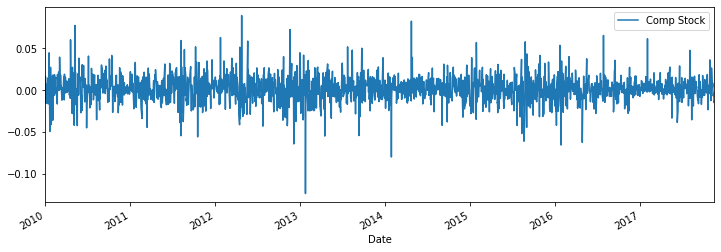

In [8]:
df_comp.plot(figsize=(12,4))

In [9]:
from statsmodels.tsa.stattools import adfuller
def adf_test(price):
    result=adfuller(price) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [11]:
adf_test(df_comp['Comp Stock'])

ADF Test Statistic : -12.473386265908276
p-value : 3.207774293089398e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


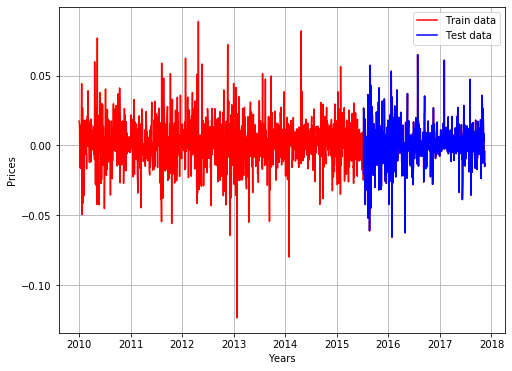

In [13]:
size=int(len(df_comp)*0.70)
train_data, test_data = df_comp[0:size], df_comp[size:]
plt.figure(figsize=(8,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Prices')
plt.plot(df_comp,'red',label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data,order=(5,1,1))
results=model.fit()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                 1387
Model:                 ARIMA(5, 1, 1)   Log Likelihood                3717.859
Method:                       css-mle   S.D. of innovations              0.017
Date:                Sun, 01 Nov 2020   AIC                          -7419.718
Time:                        17:35:56   BIC                          -7377.839
Sample:                             1   HQIC                         -7404.055
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.669e-07   1.14e-06     -0.586      0.558    -2.9e-06    1.57e-06
ar.L1.D.Comp Stock     0.0183      0.027      0.682      0.495      -0.034       0.071
ar.L2.D.Comp Stock     0.0035      0.027      0.131      0.896      -0.049       0.056
ar.L3.D.Comp Stock    -0.0358      0.027     -1.336      0.182      -0.088       0.017
ar.L4.D.Comp Stock     0.0492      0.027      1.834      0.067      -0.003       0.102
ar.L5.D.Comp Stock    -0.0481      0.027     -1.794      0.073      -0.101       0.004
ma.L1.D.Comp Stock    -0.9993      0.003   -382.973      0.000      -1.004      -0.994
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6172           -0.0000j            1.6172           -0.5000
AR.2           -0.3313           -1.7767j            1.8073           -0.2793
AR.3           -0.3313           +1.7767j            1.8073            0.2793
AR.4            1.6508           -1.0990j            1.9831           -0.0935
AR.5            1.6508           +1.0990j            1.9831            0.0935
MA.1            1.0007           +0.0000j            1.0007            0.0000
-----------------------------------------------------------------------------
"""

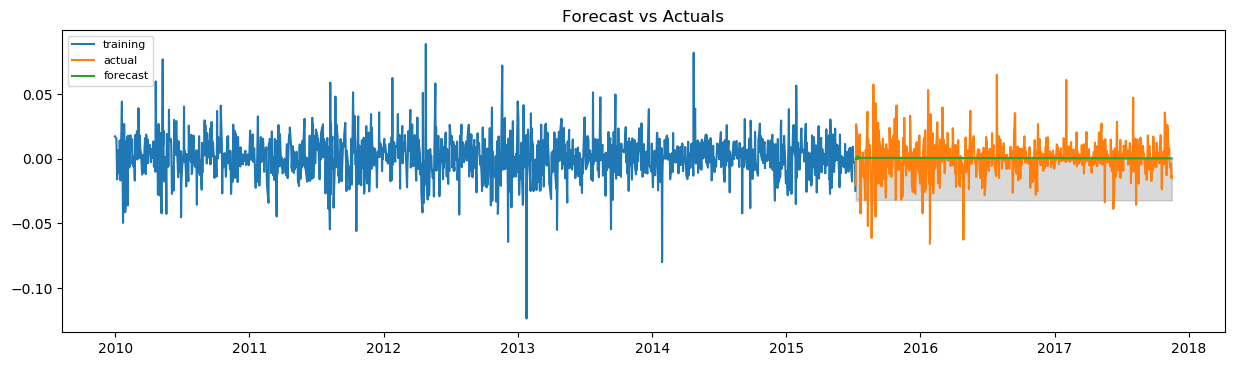

In [16]:
fc, se, conf = results.forecast(596, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(15,4), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [17]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

MSE: 0.00021278117988967514
MAE: 0.0101115953084999
RMSE: 0.014587020939509037


In [18]:
fc_series

Date
2015-07-09   -0.000126
2015-07-10    0.000611
2015-07-13    0.001669
2015-07-14   -0.000344
2015-07-15    0.001887
                ...   
2017-11-09    0.000320
2017-11-10    0.000320
2017-11-13    0.000319
2017-11-14    0.000318
2017-11-15    0.000318
Length: 596, dtype: float64

In [20]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_comp.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [21]:
df_comp_future=pd.DataFrame(index=future_dates[1:],columns=df_comp.columns)

In [22]:
df_comp_future.tail()

,Comp Stock
2022-06-15,NaN
2022-07-15,NaN
2022-08-15,NaN
2022-09-15,NaN
2022-10-15,NaN


In [23]:
fc1, se1, conf1 = results.forecast(59, alpha=0.05)  # 95% confidence
fc1_series = pd.Series(fc1, index=df_comp_future.index)
fc1_series

2017-12-15   -0.000126
2018-01-15    0.000611
2018-02-15    0.001669
2018-03-15   -0.000344
2018-04-15    0.001887
2018-05-15    0.000730
2018-06-15    0.000805
2018-07-15    0.000571
2018-08-15    0.000815
2018-09-15    0.000651
2018-10-15    0.000716
2018-11-15    0.000692
2018-12-15    0.000720
2019-01-15    0.000698
2019-02-15    0.000709
2019-03-15    0.000703
2019-04-15    0.000705
2019-05-15    0.000702
2019-06-15    0.000703
2019-07-15    0.000701
2019-08-15    0.000701
2019-09-15    0.000700
2019-10-15    0.000700
2019-11-15    0.000699
2019-12-15    0.000698
2020-01-15    0.000698
2020-02-15    0.000697
2020-03-15    0.000696
2020-04-15    0.000696
2020-05-15    0.000695
2020-06-15    0.000694
2020-07-15    0.000694
2020-08-15    0.000693
2020-09-15    0.000692
2020-10-15    0.000692
2020-11-15    0.000691
2020-12-15    0.000690
2021-01-15    0.000690
2021-02-15    0.000689
2021-03-15    0.000688
2021-04-15    0.000688
2021-05-15    0.000687
2021-06-15    0.000686
2021-07-15 

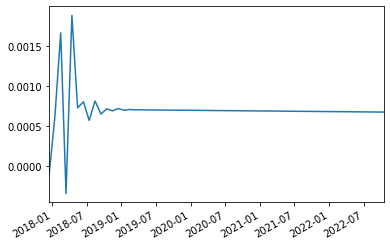

In [24]:
fc1_series.plot()

In [25]:
df_comp_fc=pd.concat([df_comp,df_comp_future])
df_comp_fc.reset_index(inplace=True)
df_comp_fc.tail()


,index,Comp Stock
2038,2022-06-15,NaN
2039,2022-07-15,NaN
2040,2022-08-15,NaN
2041,2022-09-15,NaN
2042,2022-10-15,NaN


In [26]:
df_comp_fc['forecast']=results.predict(start=97,end=144,dynamic=True)
df_comp_fc

,index,Comp Stock,forecast
0,2009-12-31,0.017354,NaN
1,2010-01-04,0.015565,NaN
2,2010-01-05,0.001729,NaN
3,2010-01-06,-0.015906,NaN
4,2010-01-07,-0.001849,NaN
...,...,...,...
2038,2022-06-15,NaN,NaN
2039,2022-07-15,NaN,NaN
2040,2022-08-15,NaN,NaN
2041,2022-09-15,NaN,NaN
